# Lab part 1

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [77]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [78]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [79]:
def turnPE8(x):
    x = x.lower()
    return x.replace(' ','_')

In [80]:
customer_df.columns = list(map(turnPE8,customer_df.columns ))

In [81]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

C:\Users\Kevin\AppData\Local\Temp\ipykernel_10468\791879803.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])


In [82]:
numerical_df = customer_df.select_dtypes('number')

In [83]:
numerical_df.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [84]:
# this function differenciates between variables and returns two lists of column names
def differentiate_variables(df):
    continuous_vars = []
    discrete_vars = []
    for column in df.columns:
        unique_values = df[column].nunique()
        if unique_values > 250:  # adjust value, based on dataset, I've decided to consider all columns considering count of occurances and those counting months into discreat values
            continuous_vars.append(column)
        else:
            discrete_vars.append(column)
    return continuous_vars, discrete_vars

In [85]:
# create two dataframes
continuous_vars, discrete_vars = differentiate_variables(numerical_df)

continuous_df = numerical_df[continuous_vars]
discrete_df = numerical_df[discrete_vars]

display(continuous_df.head())
discrete_df.head()

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879


,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1


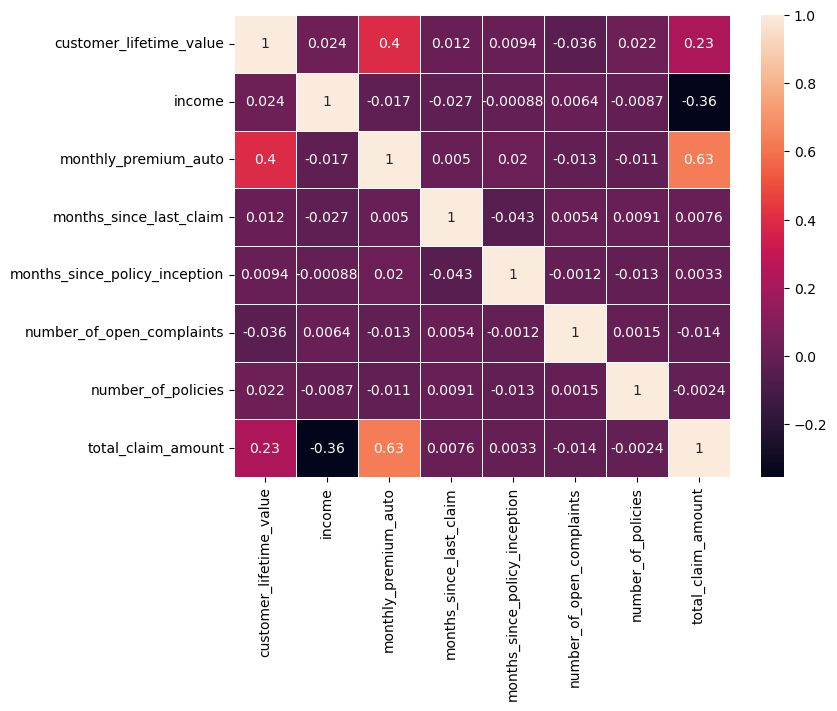

In [86]:
# correlation matrix and heatmap
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.show()

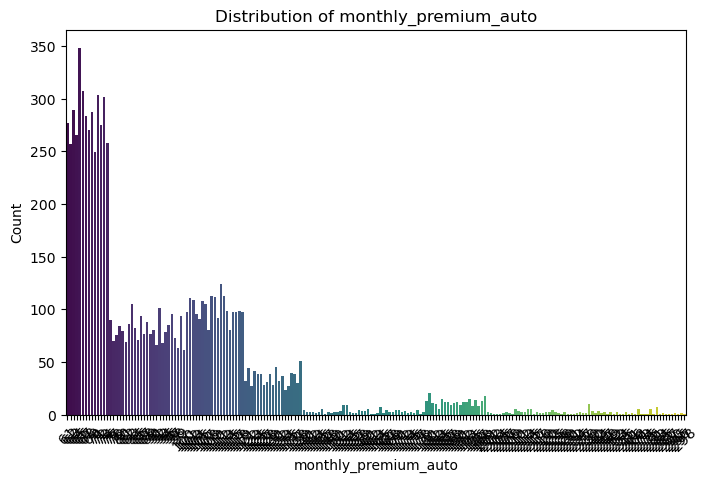

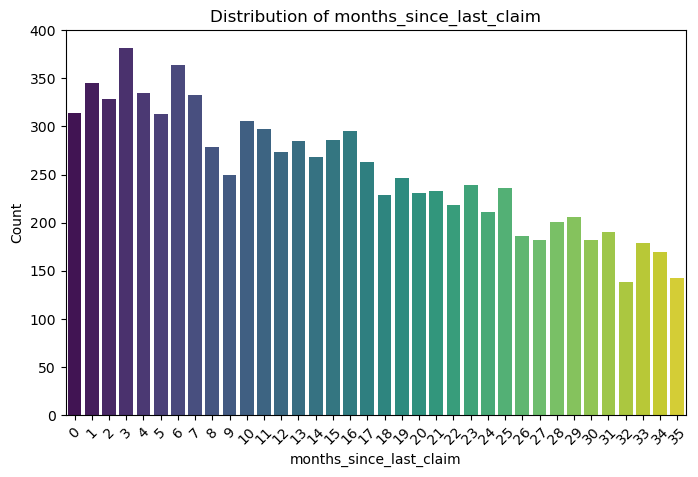

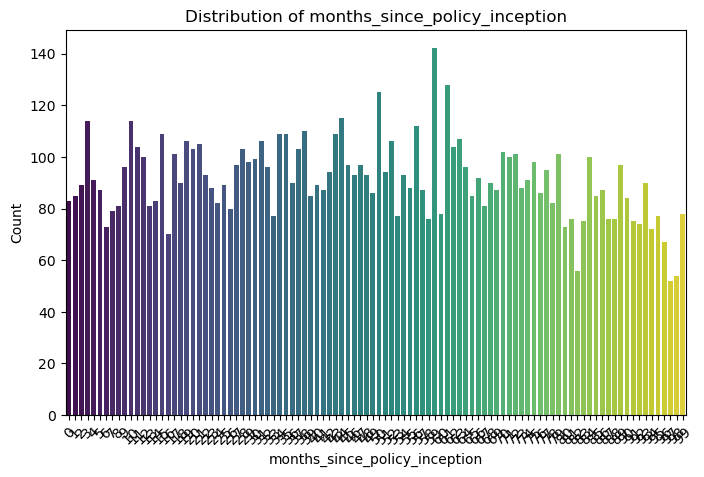

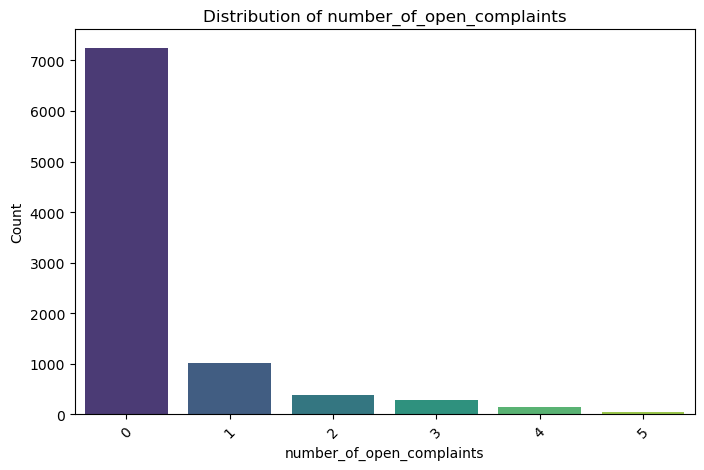

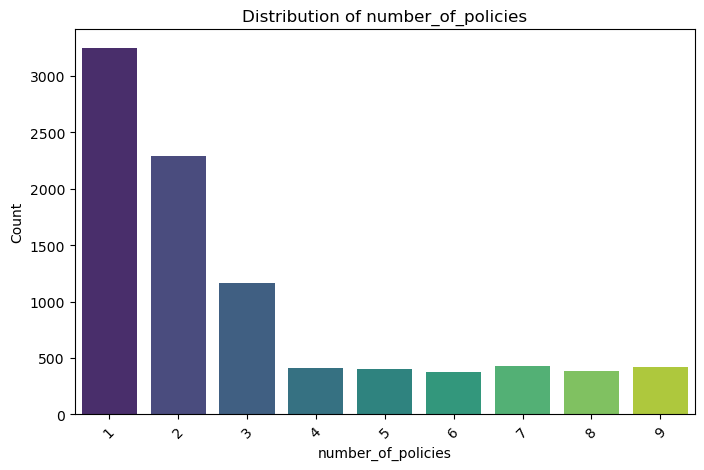

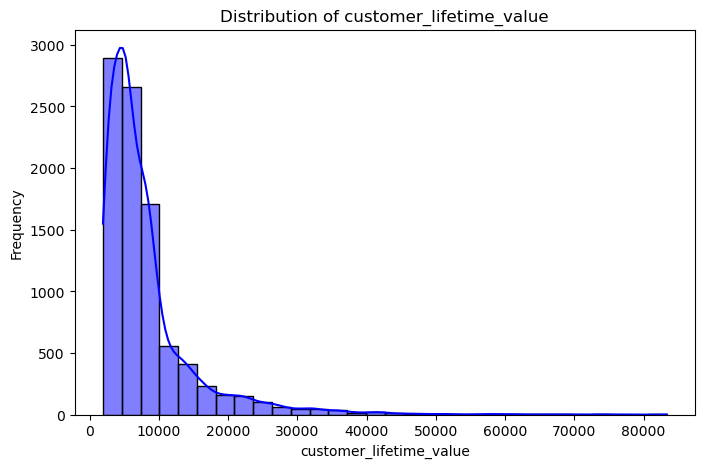

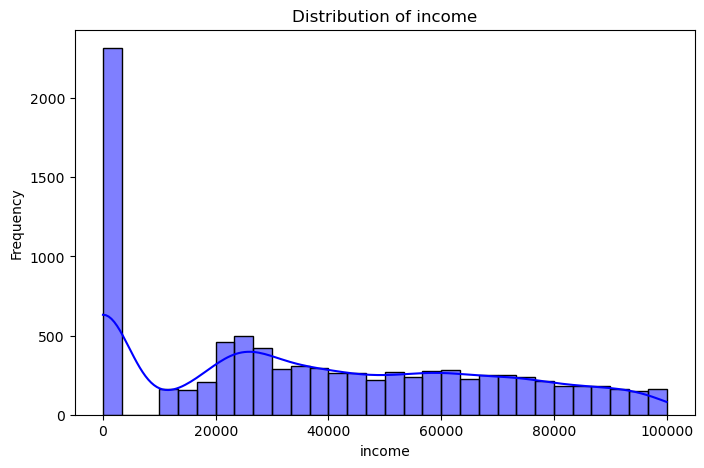

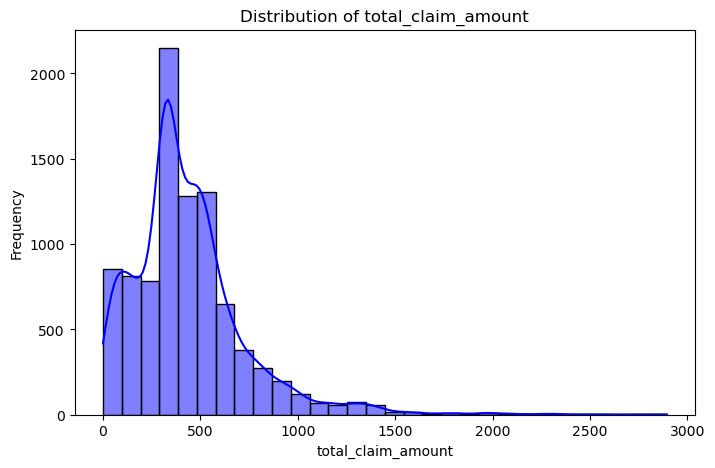

In [87]:
def plot_discrete_variables(df):
    for column in df.columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=column, data=df, palette='viridis')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

def plot_continuous_variables(df):
    for column in df.columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[column], kde=True, color='blue', bins=30)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

# Plotting discrete variables
plot_discrete_variables(discrete_df)

# Plotting continuous variables
plot_continuous_variables(continuous_df)

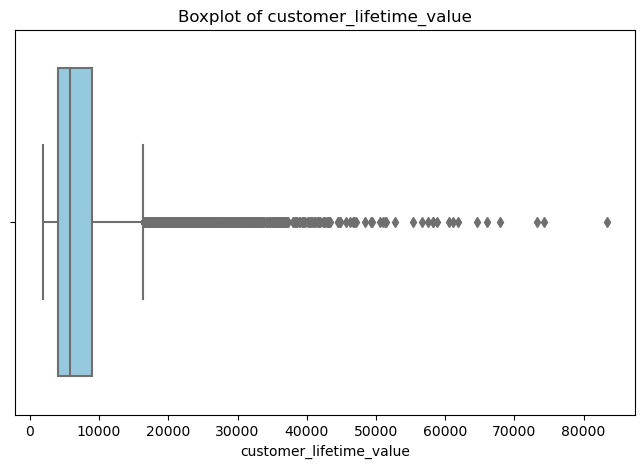

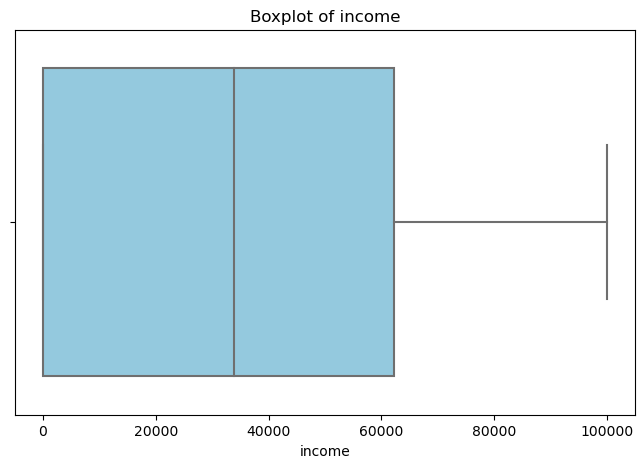

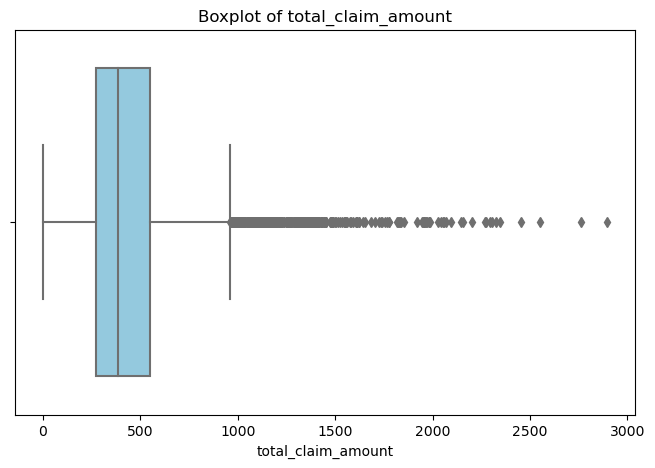

In [88]:
def plot_boxplots(df):
    for column in df.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[column], color='skyblue')
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
        plt.show()

# Plotting box plots for continuous variables
plot_boxplots(continuous_df)

In [89]:
# we assessed the graphs visually and thought customer_lifetime_value greater than 1500 is a good point to differenciate outliers, but just in case,check how many points are above 1500:
customer_df[customer_df['total_claim_amount']>1500].shape

(66, 24)

In [90]:
# we drop those values
customer_df = customer_df[customer_df['total_claim_amount']<=1500]

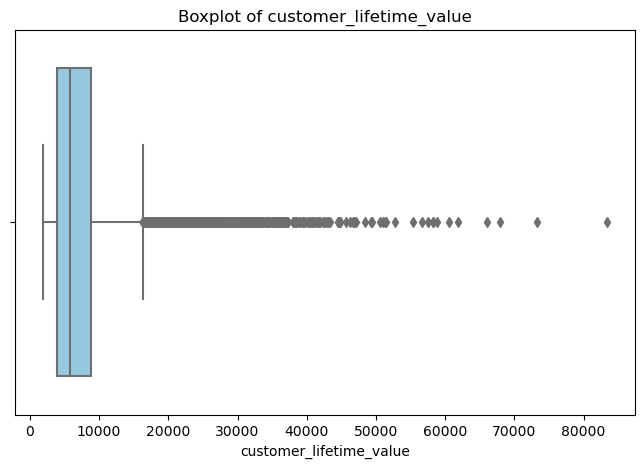

In [91]:
plot_boxplots(customer_df[['customer_lifetime_value']])

In [92]:
# same as above, but decided to remove at threashhold of 45000 for customer_lifetime_value
customer_df[customer_df['customer_lifetime_value']>45000].shape

(26, 24)

In [93]:
customer_df = customer_df[customer_df['customer_lifetime_value']<=45000]

In [94]:
customer_df.isnull().sum() #No NaN values!

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [95]:
#save
# numerical_df = customer_df.select_dtypes('number')
# numerical_df.to_csv('numerical.csv', index=False)

# Lab part 2

In [96]:
numerical_df = customer_df.select_dtypes('number')

In [97]:
categorical_df = customer_df.drop(numerical_df.columns, axis=1)
categorical_df = categorical_df.drop(['customer','effective_to_date'], axis=1)
categorical_df.isnull().sum() #doesn't contain null values as long as pandas is concerned, will check if there's any null value otherwise recorded while going through each column

state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [98]:
for col in categorical_df.columns:
    print(categorical_df[col].value_counts(dropna=False))

state
California    3119
Oregon        2573
Arizona       1690
Nevada         872
Washington     788
Name: count, dtype: int64
response
No     7734
Yes    1308
Name: count, dtype: int64
coverage
Basic       5539
Extended    2710
Premium      793
Name: count, dtype: int64
education
Bachelor                2725
College                 2654
High School or Below    2584
Master                   737
Doctor                   342
Name: count, dtype: int64
employmentstatus
Employed         5662
Unemployed       2265
Medical Leave     431
Disabled          402
Retired           282
Name: count, dtype: int64
gender
F    4623
M    4419
Name: count, dtype: int64
location_code
Suburban    5698
Rural       1769
Urban       1575
Name: count, dtype: int64
marital_status
Married     5262
Single      2417
Divorced    1363
Name: count, dtype: int64
policy_type
Personal Auto     6717
Corporate Auto    1948
Special Auto       377
Name: count, dtype: int64
policy
Personal L3     3390
Personal L2     2101
Pe

In [99]:
#checked everything, and these columns all look fine. Then:
#looking at policy and policy_type, it occurs to me that the policy column contains redundant information for the general policy_type "personal","corporate","special".

In [100]:
#so I decide to erase the prior part in the policy column, this would also establish new relationships within this column, essentially considering same level "L#" regardless of policy_type the same, maybe this would make the model perform better
def cleanpolicy(value):
    if 'L1' in value:
        return 'L1'
    elif 'L2' in value:
        return 'L2'
    elif 'L3' in value:
        return 'L3'
    else:
        return '!!!something wrong here!!!'

categorical_df['policy'] = categorical_df['policy'].apply(cleanpolicy)
categorical_df['policy'].value_counts()

policy
L3    4544
L2    2854
L1    1644
Name: count, dtype: int64

In [101]:
# we group all the smaller values in employmentstatus and vehicle_class into the same one to ease encoding.
def cleanemploymentstatus(value):
    if 'Medical Leave' in value:
        return 'Not Working'
    elif 'Disabled' in value:
        return 'Not Working'
    elif 'Retired' in value:
        return 'Not Working'
    else:
        return value

def map_vehicleclass(value):
    if 'Sports Car' in value:
        return 'Luxury'
    elif 'Luxury SUV' in value:
        return 'Luxury'
    elif 'Luxury Car' in value:
        return 'Luxury'
    else: 
        return value
    
categorical_df['vehicle_class'] = categorical_df['vehicle_class'].apply(map_vehicleclass)
display(categorical_df['vehicle_class'].value_counts())


categorical_df['employmentstatus'] = categorical_df['employmentstatus'].apply(cleanemploymentstatus)
categorical_df['employmentstatus'].value_counts()

vehicle_class
Four-Door Car    4621
Two-Door Car     1886
SUV              1778
Luxury            757
Name: count, dtype: int64

employmentstatus
Employed       5662
Unemployed     2265
Not Working    1115
Name: count, dtype: int64

In [102]:
#save file
# categorical_df.to_csv('categorical.csv', index=False)

# Lab part 3

In [103]:
# load the same data under the same variable, run this once
# categorical_df = pd.read_csv('categorical.csv')

In [104]:
categorical_df.head(3)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,Medsize


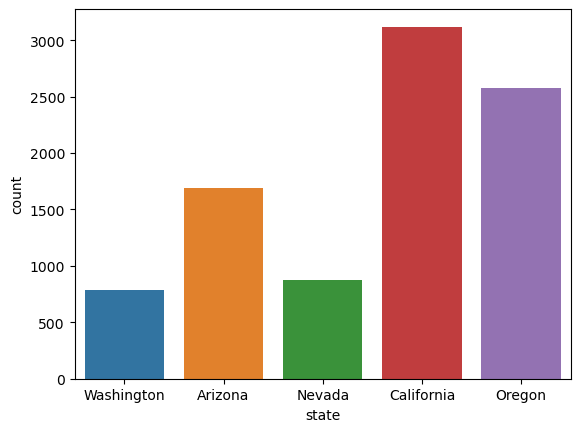

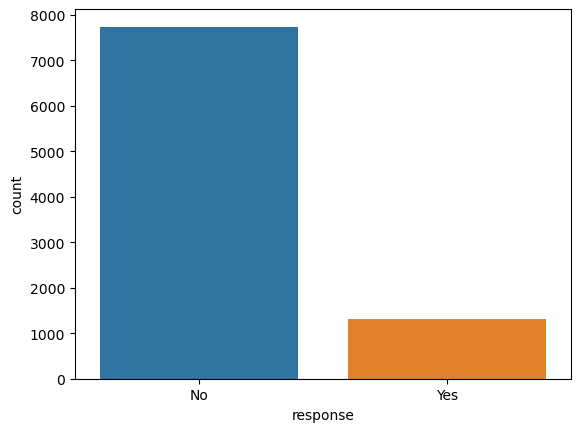

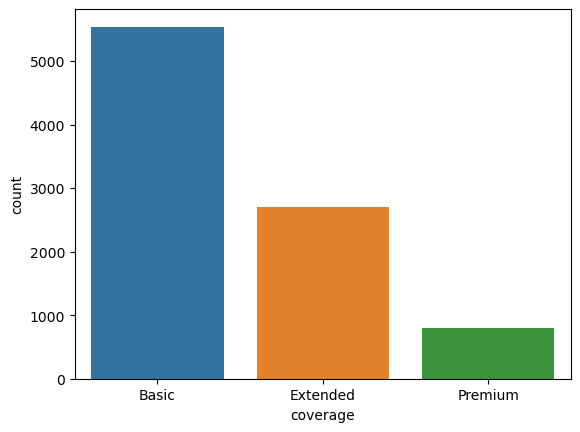

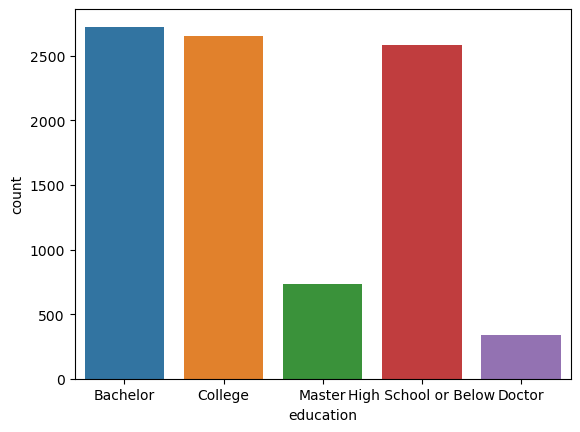

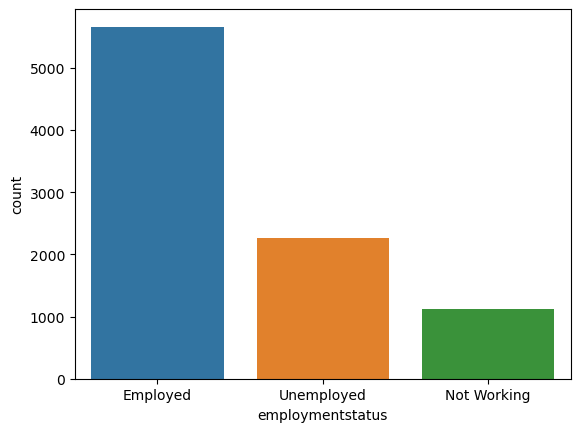

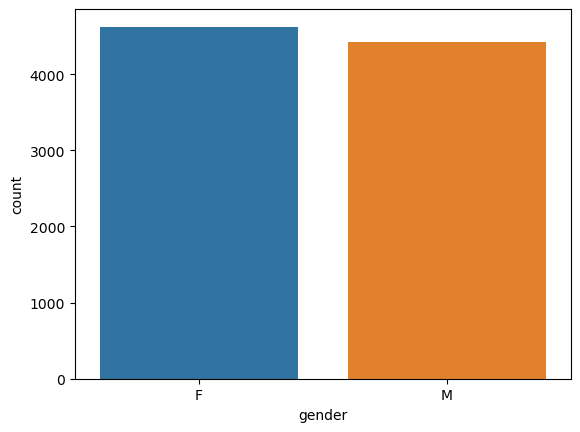

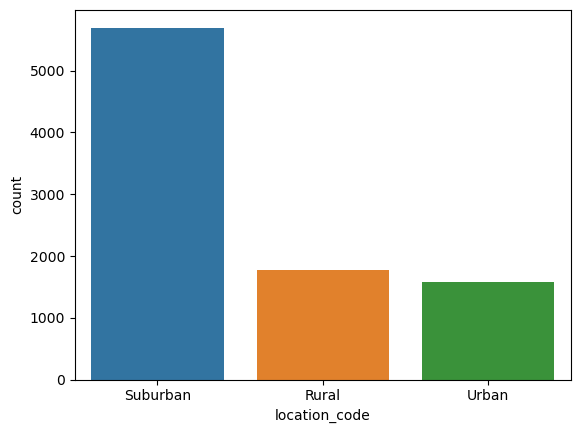

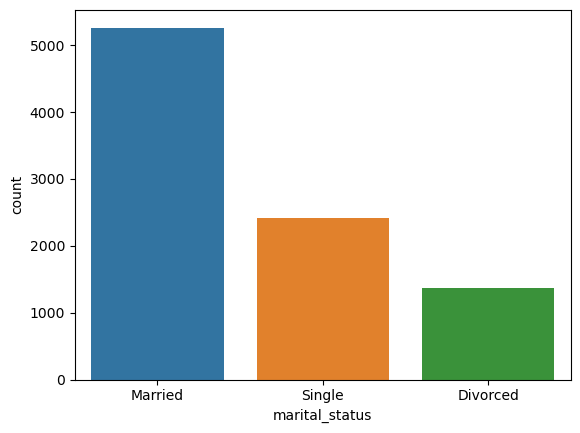

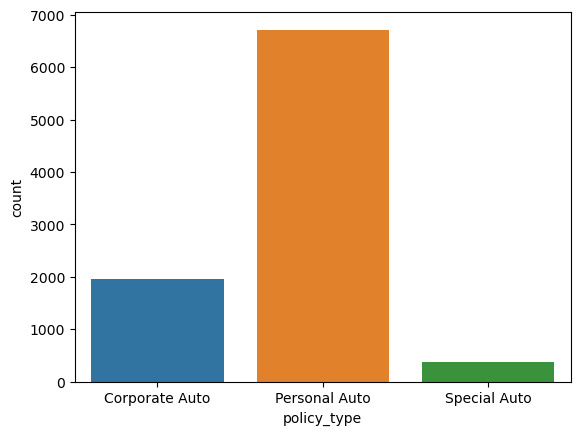

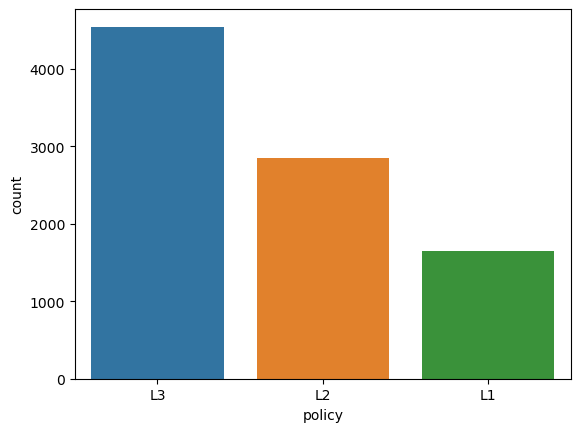

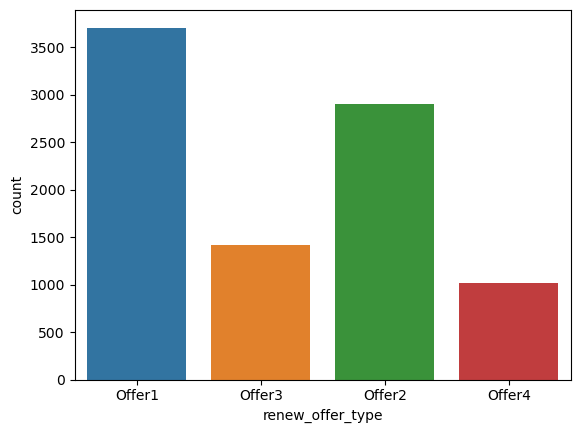

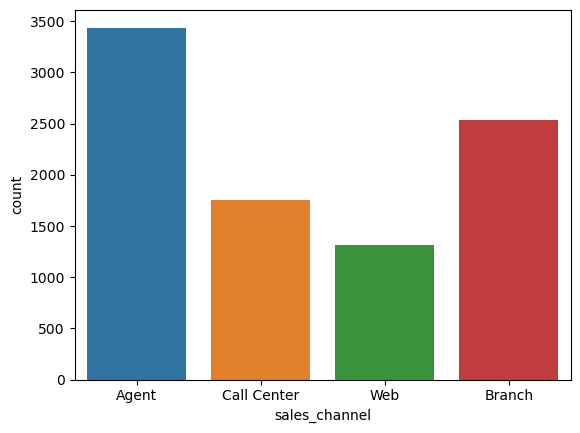

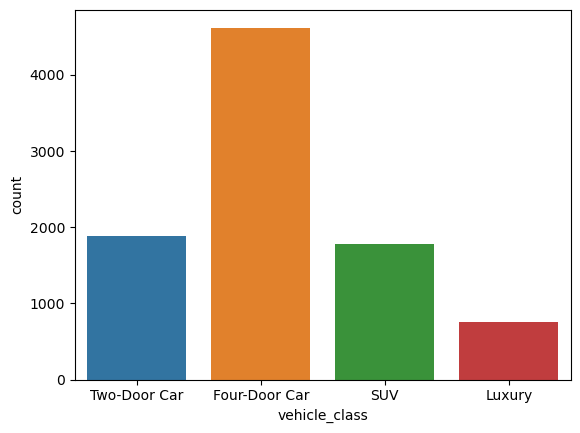

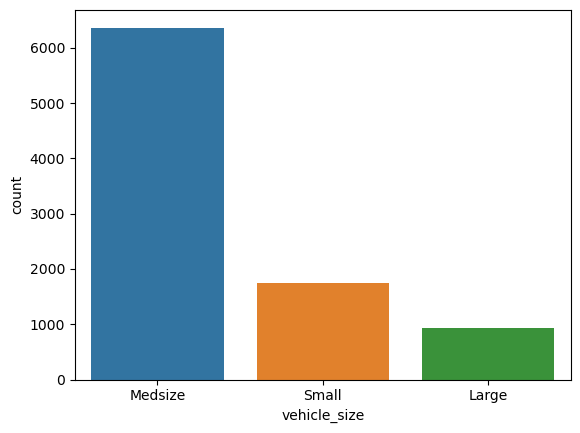

In [105]:
#plot with countplot
for col in categorical_df:
    sns.countplot(data=categorical_df, x=col)
    plt.show()


In [106]:
# from visually inspecting the graphs as well as thinking about the information contained in each feature, I want to test for the columns vehicle_class and vehicle_size
# I'll do a chi2 contigency test between the column vehicle_class and vehicle_size

# alpha = 0.05
# H0: columns vehicle_class and vehicle_size are independent
import scipy.stats as st
data_crosstab = pd.crosstab(categorical_df['vehicle_size'], categorical_df['vehicle_class'], margins=False)
st.chi2_contingency(data_crosstab)[1]

0.03108570468759635

In [107]:
# we got a p-value less than the chosen alpha 0.05, therefore we reject H0, columns vehicle_class and vehicle_size are not independent
# as they are now considered redundant columns, I choose to drop vehicle_size
categorical_df.drop('vehicle_size',axis=1,inplace=True)

In [108]:
categorical_df.shape

(9042, 13)

In [109]:
#get the effective_to_date back to categorical_df
categorical_df = pd.concat([categorical_df, customer_df['effective_to_date']],axis=1).dropna()

<Axes: xlabel='effective_to_date', ylabel='Count'>

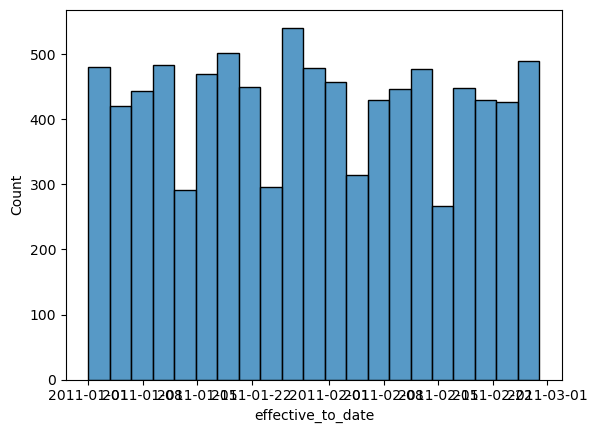

In [110]:
sns.histplot(data=categorical_df,x=categorical_df['effective_to_date'])

In [111]:
#there are some interesting finding such as the value is significantly low on four dates.
#not sure how we could change the column into to a more useful way. I'll ignore the year as all data are from the same year, and store day and month into separate columns:
categorical_df['day'] = categorical_df['effective_to_date'].dt.day
categorical_df['month'] = categorical_df['effective_to_date'].dt.month
categorical_df.drop('effective_to_date',axis=1,inplace=True)

In [112]:
categorical_df #looks fine to me

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,day,month
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,24,2
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,31,1
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,19,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,L2,Offer1,Call Center,SUV,20,1
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,L1,Offer2,Web,Four-Door Car,10,2
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,L3,Offer1,Branch,Four-Door Car,12,2
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,L2,Offer1,Branch,Four-Door Car,6,2
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,L2,Offer3,Branch,Four-Door Car,3,2
